#mengmeng wu
#data cleaning 
#decision tree and random forest model building
#model evalution

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("final_merge_ca.csv") 

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_54723/3057298602.py:1: DtypeWarning: Columns (10,11,16,17,22,23,28,29,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,100,101,102,103,104,105,106,107,108,109,110,111,118,119,122,123,124,125,128,129,136,137,138,139,142,143,144,145,190,191,192,193,226,362,363,366,367,370,371,374,375,378,379,382,383,386,387,390,391,394,395,398,399,402,403,406,407,410,411,414,415,418,419,420,421,426,427,430,431,434,435,438,439,446,447,450,451,470,471,474,475,478,479,482,483,486,487,490,491,494,495,498,499,502,503,506,507,510,511,514,515,518,519,522,523,526,527,530,531,534,535,538,539,542,543,546,547,550,551,554,555,558,559,562,563,566,567,570,571,574,575,578,579,582,583,590,591,594,595,598,599,602,603,606,607,610,611,618,619,622,623,626,627,630,631,634,635,638,639,642,643,646,647,650,651,654,655,658,659,662,663,666,667,670,671,674,675) 

### data cleaning

In [5]:
df.shape

(2346, 683)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GEO_ID', 'NAME_x', 'S1501_C01_001E',
       'S1501_C01_001M', 'S1501_C02_001E', 'S1501_C02_001M', 'S1501_C03_001E',
       'S1501_C03_001M',
       ...
       'DP05_0080M', 'DP05_0080PE', 'DP05_0080PM', 'DP05_0081E', 'DP05_0081M',
       'DP05_0081PE', 'DP05_0081PM', 'Unnamed: 326', 'in_county', 'target'],
      dtype='object', length=683)

In [7]:
#select the variables we need
selected_columns = ['target',"S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [8]:
#mapping colname using codebook
colname_dic = {"S1501_C01_014E": "highschool degree or higher rate", 
               "S1903_C02_001E": "household median income", 
               "S1903_C02_002E": "white household median income",
               "S1903_C02_003E": "black household median income",
               "DP05_0032PE": "white race rate",
               "DP05_0033PE": "black race rate",
               "target": "one or more homicides"
               }

In [9]:
df = df[selected_columns]

In [10]:
df.columns

Index(['target', 'S1501_C01_014E', 'S1903_C02_001E', 'S1903_C02_002E',
       'S1903_C02_003E', 'DP05_0032PE', 'DP05_0033PE'],
      dtype='object')

In [11]:
#check if there is missing values 
null_sum = df.isnull().sum()

null_sum

target            0
S1501_C01_014E    0
S1903_C02_001E    0
S1903_C02_002E    0
S1903_C02_003E    0
DP05_0032PE       0
DP05_0033PE       0
dtype: int64

In [12]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
-        18
100.0    12
94.6     11
96.8     10
96.3      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1020, dtype: int64

In [13]:
#replace dash with missing value
df.replace('-', np.nan, inplace=True)

In [14]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [15]:
x_variable = ["S1501_C01_014E","S1903_C02_001E", "S1903_C02_002E", "S1903_C02_003E", "DP05_0032PE", "DP05_0033PE"]

In [16]:
#remove the str expressions before changing data type
for x in x_variable:
    df[x] = df[x].replace({
        ',': '',
        r'\-$': '',
        r'\+$': ''
    }, regex=True)


In [17]:
df.isna().sum()

target              0
S1501_C01_014E     18
S1903_C02_001E     34
S1903_C02_002E     40
S1903_C02_003E    941
DP05_0032PE        17
DP05_0033PE        17
dtype: int64

In [18]:
df["S1501_C01_014E"].value_counts()

S1501_C01_014E
100.0    12
94.6     11
96.8     10
94.8      9
95.9      9
         ..
43.1      1
38.7      1
34.0      1
58.7      1
0.0       1
Name: count, Length: 1019, dtype: int64

In [19]:
#convert the data type to numerical value
df[selected_columns] = df[selected_columns].astype('float')
df2 = df.copy()


In [20]:
#replace missing value in x using mean
for col in x_variable:  
    df[col].fillna(value = df[col].mean(), inplace=True)

/var/folders/3y/pp5rq62s315dq6zz6hm6ywg40000gn/T/ipykernel_54723/1433626373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value = df[col].mean(), inplace=True)


In [21]:
#drop missing value in x 
df2 = df2.dropna(subset=x_variable)

In [22]:
#check target value distribution
print(df['target'].value_counts())
print(df2['target'].value_counts())

target
0.0    1944
1.0     402
Name: count, dtype: int64
target
0.0    1131
1.0     271
Name: count, dtype: int64


we can see there is a large data imbalance with case 0 almost five times of case 1. We will further tackle this issue in the model building part.

In [23]:
#rename the column name
df.rename(columns=colname_dic, inplace=True)
df2.rename(columns=colname_dic, inplace=True)
x_variables = [col for col in df.columns if col != 'one or more homicides']

<Axes: xlabel='household median income', ylabel='Count'>

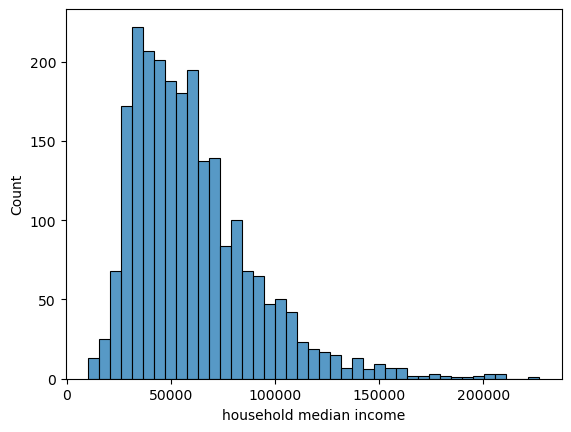

In [24]:
#data transformation
#check data distribution
import seaborn as sns
sns.histplot(df['household median income'])

some of the variables do not strictly follow the normal distribution. therefore, we choose minmax scaler to do data standardization

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df[x_variables] = scaler.fit_transform(df[x_variables])

### model training

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (2.0, 2.0)
%matplotlib inline

In [28]:
X = df[[col for col in df.columns if col != 'one or more homicides']]
y = df["one or more homicides"]

In [29]:
# split the data into training and testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=929) 

In [30]:
# Create a DecisionTreeClassifier object.  
# 1. explore the base model fisrt. set criterion = "entropy" and random_state =929, and keep all the other parameters with the default value.
dt_clf1 = DecisionTreeClassifier(random_state=929,criterion='entropy') 

In [31]:
dt_clf1 = dt_clf1.fit(X_train1, y_train1)

In [32]:
from sklearn.model_selection import KFold, cross_validate 

In [33]:
# 2. Evaluate the DecisionTreeClassifier performance using kfolder
# Perform KFold splitting

kf = KFold(n_splits=5, shuffle=True, random_state=929)
scores = cross_validate(dt_clf1, X_train1, y_train1, cv=kf,
                       scoring=['accuracy', 'precision', 'recall'])


print("Accuracy scores: ", scores['test_accuracy'])
print("Precision scores: ", scores['test_precision'])
print("Recall scores: ", scores['test_recall'])

print("Mean Accuracy: ", scores['test_accuracy'].mean())
print("Mean Precision: ", scores['test_precision'].mean())
print("Mean Recall: ", scores['test_recall'].mean())

Accuracy scores:  [0.69946809 0.70666667 0.74933333 0.728      0.688     ]
Precision scores:  [0.12903226 0.19736842 0.25       0.16       0.20512821]
Recall scores:  [0.11940299 0.234375   0.28333333 0.23529412 0.22535211]
Mean Accuracy:  0.7142936170212766
Mean Precision:  0.18830577684907057
Mean Recall:  0.21955150974621507


3.1 through validation, the first model we explore should be improved on the precision and recall score for case 1. The low scores are likely due to the data imbalance. So we are extracting 1/4 from the x value data in the original data for training

In [34]:
X_zeros = X_train1[y_train1 == 0]
y_zeros = y_train1[y_train1 == 0]
X_ones = X_train1[y_train1 == 1]
y_ones = y_train1[y_train1 == 1]

X_zeros_sampled = X_zeros.sample(n=len(X_zeros) // 4, random_state=929)
y_zeros_sampled = y_zeros[X_zeros_sampled.index]

X_train2= pd.concat([X_zeros_sampled, X_ones])
y_train2 = pd.concat([y_zeros_sampled, y_ones])


In [35]:
X_train2.shape

(703, 6)

In [36]:
pd.DataFrame([np.round(dt_clf1.feature_importances_,2)], columns= x_variables)

,highschool degree or higher rate,household median income,white household median income,black household median income,white race rate,black race rate
0,0.2,0.17,0.15,0.11,0.19,0.19


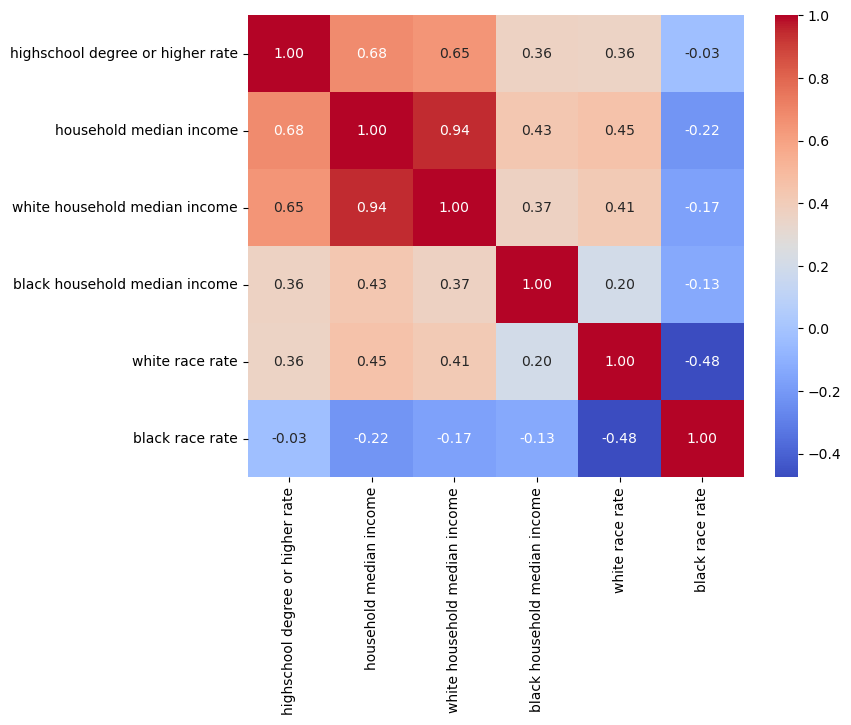

In [37]:
corr_matrix = df[x_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

3.2 based on the feature importance and multicollinearity， I further filtered out two features

In [38]:

x_variables = ['highschool degree or higher rate', 'white household median income',
              'white race rate', 'black race rate']

In [39]:
df_update = df[x_variables + ['one or more homicides']]

In [40]:
X_train2 = X_train2[x_variables]

In [41]:
#check model complexity
dt_clf1.get_n_leaves()

306

In [42]:
dt_clf1.get_depth()

30

In [43]:
dt_clf1.tree_.n_node_samples

array([1876,  984,  926,   15,    4,   11,    6,    5,    2,    3,    1,
          2,  911,  779,  162,   14,    5,    9,    3,    6,    3,    3,
          2,    1,  148,  124,    5,    2,    3,  119,   48,    7,    6,
          1,   41,   71,   70,    1,   69,   27,   42,   30,   23,    6,
         17,    1,   16,   11,    8,    4,    2,    2,    4,    3,    5,
          7,   12,    1,   24,    2,   22,    6,   16,    2,   14,    1,
         13,    4,    1,    3,    2,    1,    9,  617,   11,    8,    3,
          2,    1,    5,    3,  606,   20,   18,    2,    1,    1,  586,
          6,    1,    5,    4,    1,  580,   17,    4,   13,    5,    1,
          4,    8,    7,    1,  563,   13,  550,  244,  215,  127,  124,
         66,   58,   45,   42,   29,    7,   22,   20,   15,    1,   14,
          5,    2,    3,    2,    1,    2,   13,    3,    2,    1,   13,
          8,    5,    3,   58,   35,   24,   18,    4,   14,    6,    8,
          2,    6,    5,    1,    6,   11,   23,   

In [44]:
#3.3 considering the model complexity, it may risk overfitting. so we then tune parameters using gridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=929,criterion='entropy', max_depth = 15, max_features = 4) 

In [45]:
from sklearn.model_selection import GridSearchCV
dt_clf2 = DecisionTreeClassifier(random_state=929)

param_grid = {
    'max_depth': [5, 10, 15, 20,25,30],
    'max_features': [3,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_cv = GridSearchCV(estimator=dt_clf2, param_grid=param_grid, cv=5,
                           scoring={
                            'precision': 'precision',
                            'recall': 'recall',
                            'accuracy': 'accuracy',
                            'f1-score': "f1"},
                            refit='recall') #choose recall here because the most important info for us to predict more cases which will happen in reality

grid_cv.fit(X_train2, y_train2)
# Print the accuracy of Decision Tree Classifier
print("Best parameters found: ", grid_cv.best_params_)
print("Best score achieved: ", grid_cv.best_score_)

print("\nDetailed cross-validation results:")
for params, mean_accuracy, mean_precision, mean_recall, mean_f1 in zip(
    grid_cv.cv_results_['params'],
    grid_cv.cv_results_['mean_test_accuracy'],
    grid_cv.cv_results_['mean_test_precision'],
    grid_cv.cv_results_['mean_test_recall'],
    grid_cv.cv_results_['mean_test_f1-score']
):
    print(f"\nParameters: {params}")
    print(f"Accuracy: {mean_accuracy:.3f}")
    print(f"Precision: {mean_precision:.3f}")
    print(f"Recall: {mean_recall:.3f}")
    print(f"f1-score: {mean_f1:.3f}")

Best parameters found:  {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score achieved:  0.5078341013824884

Detailed cross-validation results:

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.539
Precision: 0.480
Recall: 0.473
f1-score: 0.468

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.536
Precision: 0.475
Recall: 0.457
f1-score: 0.457

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.538
Precision: 0.471
Recall: 0.444
f1-score: 0.445

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.541
Precision: 0.480
Recall: 0.460
f1-score: 0.461

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.538
Precision: 0.477
Recall: 0.457
f1-score: 0.458

Parameters: {'max_d

In [46]:
feature_importances = grid_cv.best_estimator_.feature_importances_

importance_df = pd.DataFrame(
    [np.round(feature_importances, 2)], 
    columns=x_variables
)

print(importance_df)

   highschool degree or higher rate  white household median income  \
0                              0.34                            0.2   

   white race rate  black race rate  
0             0.26              0.2  


In [47]:
#random forest
from sklearn.ensemble import RandomForestClassifier
dt_clf3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 929,class_weight='balanced',max_depth = 20)

In [48]:
rf_clf = RandomForestClassifier(random_state=929)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, 20],
    'max_features': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    estimator=rf_clf, 
    param_grid=rf_param_grid, 
    cv=5,
    scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy',
    'f1-score': "f1"
},
    refit='recall')

rf_grid.fit(X_train2, y_train2)

print("Best parameters found: ", rf_grid.best_params_)
print("Best score achieved: ", rf_grid.best_score_)

print("\nDetailed cross-validation results:")
for params, mean_accuracy, mean_precision, mean_recall, mean_f1 in zip(
    grid_cv.cv_results_['params'],
    grid_cv.cv_results_['mean_test_accuracy'],
    grid_cv.cv_results_['mean_test_precision'],
    grid_cv.cv_results_['mean_test_recall'],
    grid_cv.cv_results_['mean_test_f1-score']
):
    print(f"\nParameters: {params}")
    print(f"Accuracy: {mean_accuracy:.3f}")
    print(f"Precision: {mean_precision:.3f}")
    print(f"Recall: {mean_recall:.3f}")
    print(f"f1-score: {mean_f1:.3f}")

Best parameters found:  {'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score achieved:  0.46656426011264723

Detailed cross-validation results:

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.539
Precision: 0.480
Recall: 0.473
f1-score: 0.468

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.536
Precision: 0.475
Recall: 0.457
f1-score: 0.457

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.538
Precision: 0.471
Recall: 0.444
f1-score: 0.445

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.541
Precision: 0.480
Recall: 0.460
f1-score: 0.461

Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.538
Precision: 0.477
Recall: 0.457
f1-score: 0.4

In [77]:
feature_importances = rf_grid.best_estimator_.feature_importances_

importance_df = pd.DataFrame(
    [np.round(feature_importances, 2)], 
    columns=x_variables
)

print(importance_df)

   highschool degree or higher rate  white household median income  \
0                              0.25                           0.26   

   white race rate  black race rate  
0             0.26             0.23  


### model evaluation

In [49]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
y_pred = dt_clf1.predict(X_test1)
y_true = y_test1
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       381
         1.0       0.24      0.26      0.25        89

    accuracy                           0.71       470
   macro avg       0.53      0.54      0.54       470
weighted avg       0.71      0.71      0.71       470



model1: we can see although it has a high accuracy, the precision and recall for case 1 is very low. this indicates it can accurately predict for case 0 but due to data imbalance, has low predicting ability for case y.

In [51]:
X_test2 = X_test1[x_variables]

In [52]:
y_pred = grid_cv.predict(X_test2)
y_true = y_test1

In [53]:
y_prob = grid_cv.predict_proba(X_test2)
y_prob

array([[0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.60606061, 0.39393939],
       [0.65234375, 0.34765625],
       [0.        , 1.        ],
       [0.65234375, 0.34765625],
       [0.34482759, 0.65517241],
       [0.50442478, 0.49557522],
       [0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.50442478, 0.49557522],
       [0.50442478, 0.49557522],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.65234375, 0.34765625],
       [0.

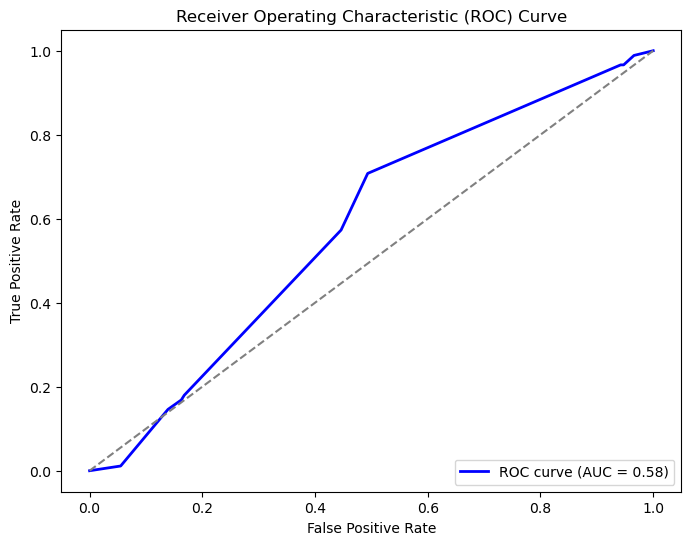

In [54]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities instead of labels
y_prob = grid_cv.predict_proba(X_test2)[:, 1]  # Get probabilities for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from the roc curve, we can see auc 0.58， which indicates we have a little above average ability to distinct values

In [55]:
confusion_matrix(y_true, y_pred,labels=[0,1])

array([[319,  62],
       [ 74,  15]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       381
         1.0       0.19      0.17      0.18        89

    accuracy                           0.71       470
   macro avg       0.50      0.50      0.50       470
weighted avg       0.69      0.71      0.70       470



from the model two, we can see that  precision and recall for case 1 reduces. But in the training process, we actually get a very good score for recall and use recall to choose the best model. Tthe reason for this might be:
1.data distribution shift
In the training process, we wanted the model to give more weight to case1, so we undersampled case0. However, in the real-world scenario, the distribution differs because homicide incidents are relatively rare. This resulted in a data distribution shift problem.

2.overfitting
The model may overfit the training data, learning certain patterns specific to the training set that do not generalize well to the test set.

In [87]:
y_pred = rf_grid.predict(X_test2)
y_true = y_test1
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.61      0.70       381
         1.0       0.21      0.44      0.28        89

    accuracy                           0.58       470
   macro avg       0.52      0.52      0.49       470
weighted avg       0.71      0.58      0.62       470



from the model three, we see it has the highest recall for case 1. this is becuase random forest can avoid the issue of overfitting by introducing noise in data training, which give a better performance in predicting new data. However, the accuracy is still lower than model 1. This indicates when using recall as the criteria to train the best model,  this may lead the model to make recall-biased decisions while overlooking overall generalization performance, such as precision and F1-score.

###further interpretation

i choose the model for California police homicide to further interpret result

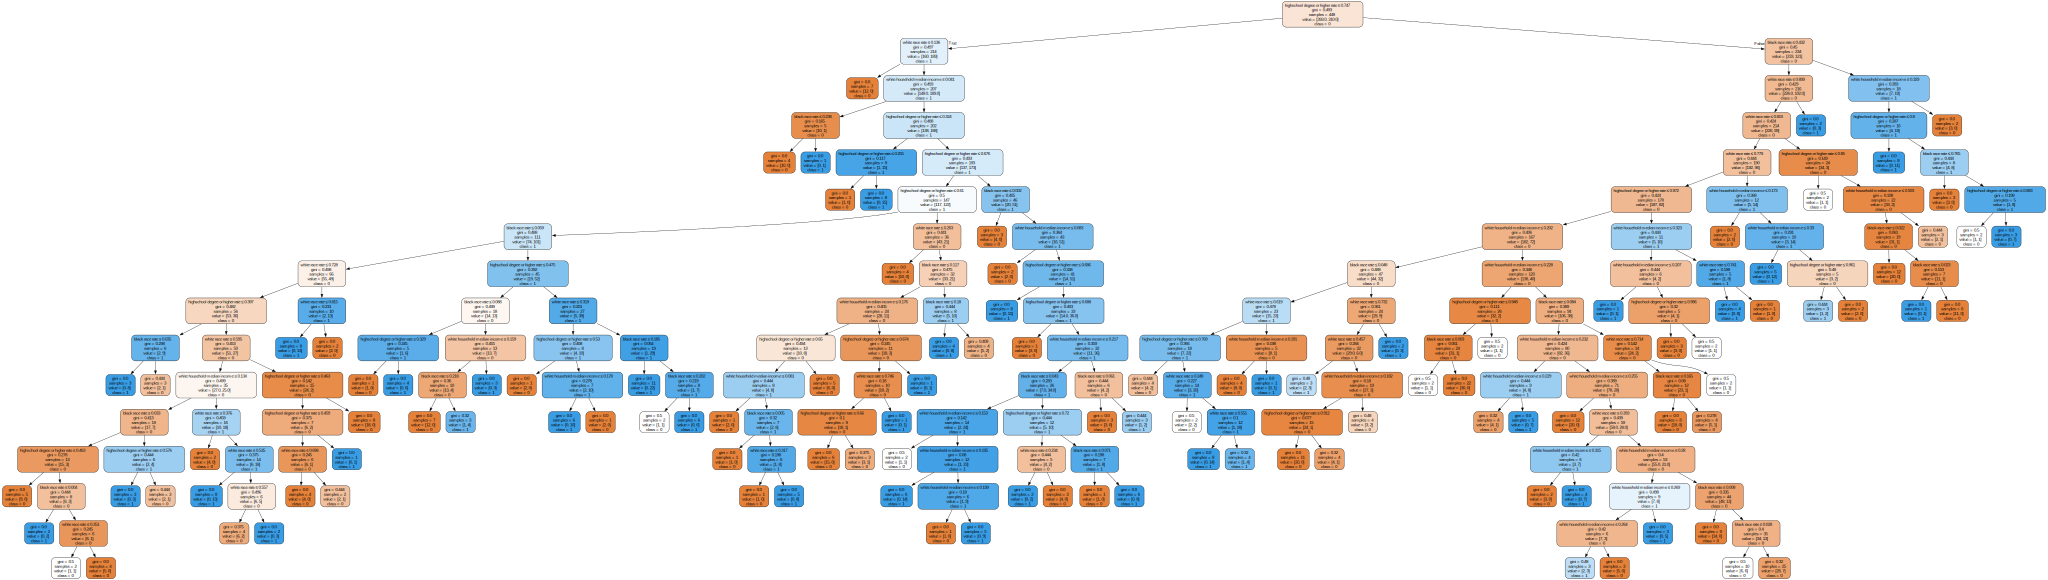

In [60]:
# tree visualization for model3(select tree from the random forest)
best_rf_model = rf_grid.best_estimator_

dot_data = tree.export_graphviz(best_rf_model.estimators_[0], out_file=None, 
                                feature_names=x_variables, 
                                class_names=["0", "1"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

the graph shows how the decision trees makes classification in the random forest model. since the random forest consists of 200 trees, i select the first tree for visualization. we can see it starts classifying by using high school degree attainment rate.  Those below 74.7% tend to be classified as class 1. This classification pattern aligns with broader socioeconomic and educational disparities. Areas with lower high school attainment rates often correlate with higher poverty levels, fewer job opportunities, and systemic disadvantages. These conditions may also be linked to higher rates of police violence and crime incidents, which could explain why the decision tree uses this feature as an early classifier.

In [85]:
# Error analysis for model1


# Convert predictions to pandas Series with the same index as X_test2
y_pred_series = pd.Series(y_pred, index=X_test1.index)
y_true_series = pd.Series(y_true, index=X_test1.index)

# Get errors using aligned indices
error_samples = X_test1[y_true_series != y_pred_series]
error_true_labels = y_true_series[y_true_series != y_pred_series]
error_pred_labels = y_pred_series[y_true_series != y_pred_series]


error_analysis = pd.DataFrame({
    'True_Label': error_true_labels,
    'Predicted_Label': error_pred_labels
})


error_analysis_m1= pd.concat([error_analysis, error_samples], axis=1)
error_analysis_m1

,True_Label,Predicted_Label,highschool degree or higher rate,household median income,white household median income,black household median income,white race rate,black race rate
305,0.0,1.0,0.951,0.232849,0.191523,0.294570,0.692,0.088136
1760,0.0,1.0,0.667,0.192890,0.192698,0.169879,0.545,0.044068
302,0.0,1.0,0.950,0.403555,0.432835,0.341269,0.814,0.064407
696,1.0,0.0,0.372,0.040918,0.017411,0.039984,0.243,0.064407
1713,0.0,1.0,0.810,0.373563,0.274989,0.358974,0.345,0.027119
...,...,...,...,...,...,...,...,...
1382,0.0,1.0,0.981,0.290083,0.273505,0.167010,0.579,0.047458
1730,1.0,0.0,0.748,0.243942,0.196587,0.278861,0.641,0.053107
177,1.0,0.0,0.841,0.197371,0.185850,0.157406,0.449,0.105085
550,0.0,1.0,0.428,0.072645,0.090503,0.039960,0.179,0.016949


In [86]:
error_analysis[error_analysis["Predicted_Label"]==1]

,True_Label,Predicted_Label
305,0.0,1.0
1760,0.0,1.0
302,0.0,1.0
1713,0.0,1.0
379,0.0,1.0
...,...,...
852,0.0,1.0
1501,0.0,1.0
1382,0.0,1.0
550,0.0,1.0


In [89]:
# Error analysis for model3

# Convert predictions to pandas Series with the same index as X_test2
y_pred_series = pd.Series(y_pred, index=X_test2.index)
y_true_series = pd.Series(y_true, index=X_test2.index)

# Get errors using aligned indices
error_samples = X_test2[y_true_series != y_pred_series]
error_true_labels = y_true_series[y_true_series != y_pred_series]
error_pred_labels = y_pred_series[y_true_series != y_pred_series]


error_analysis = pd.DataFrame({
    'True_Label': error_true_labels,
    'Predicted_Label': error_pred_labels
})


error_analysis_m1 = pd.concat([error_analysis, error_samples], axis=1)
error_analysis_m1

,True_Label,Predicted_Label,highschool degree or higher rate,white household median income,white race rate,black race rate
491,0.0,1.0,0.481,0.128096,0.507,0.014689
353,0.0,1.0,0.938,0.345256,0.577,0.018079
131,0.0,1.0,0.673,0.140798,0.616,0.039548
1760,0.0,1.0,0.667,0.192698,0.545,0.044068
302,0.0,1.0,0.950,0.432835,0.814,0.064407
...,...,...,...,...,...,...
2117,0.0,1.0,0.985,0.431216,0.796,0.033898
763,0.0,1.0,0.661,0.056282,0.254,0.511864
346,0.0,1.0,0.942,0.269836,0.813,0.049718
1801,0.0,1.0,0.937,0.429471,0.243,0.045198


In [75]:
error_analysis[error_analysis["Predicted_Label"]==1]

,True_Label,Predicted_Label,highschool degree or higher rate,white household median income,white race rate,black race rate
491,0.0,1.0,0.481,0.128096,0.507,0.014689
353,0.0,1.0,0.938,0.345256,0.577,0.018079
131,0.0,1.0,0.673,0.140798,0.616,0.039548
1760,0.0,1.0,0.667,0.192698,0.545,0.044068
302,0.0,1.0,0.950,0.432835,0.814,0.064407
...,...,...,...,...,...,...
2117,0.0,1.0,0.985,0.431216,0.796,0.033898
763,0.0,1.0,0.661,0.056282,0.254,0.511864
346,0.0,1.0,0.942,0.269836,0.813,0.049718
1801,0.0,1.0,0.937,0.429471,0.243,0.045198


in Model 1, the number of mispredictions for both classes (1 and 0) is roughly balanced, whereas in Model 3, most of the errors are cases where 0 is incorrectly predicted as 0. This discrepancy arises from our use of recall as the refit strategy and the oversampling technique, which were implemented to optimize the model.

This is a major flaw in Model 3. However, the reason we chose this optimization approach is because we are considering the social science context of this model. In this context, the most important goal is to predict the tracts where police homicides are most likely to occur, as this allows us to focus investigations and allocate police resources more effectively to prevent the escalation of issues in these regions.

However, a real-world consideration is that, in order to prevent potential problems, we may end up wasting substantial management and financial resources in areas where homicides are unlikely to occur. Therefore, when using the refit strategy for model selection, we should not only focus on recall but also manually compare other model metrics, such as the F1 score. The F1 score is a balance between precision and recall, and using it may help us achieve a better balance.

Additionally, we need to further analyze the causes of data imbalance. If the data samples themselves are biased, this could skew the model's training and testing results. In that case, we should correct the bias in the data in order to train and test the model on more accurate data, improving the overall performance and predictive accuracy of the model.